<a href="https://colab.research.google.com/github/Nachi2006/MLREPO/blob/main/childemotiondetectionconsolidated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import files

# 1. Upload the kaggle.json file you just downloaded
print("Please upload your kaggle.json file:")
files.upload()

# 2. Move it to the correct folder
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

print("Kaggle API configured successfully!")

Please upload your kaggle.json file:


Saving kaggle.json to kaggle.json
Kaggle API configured successfully!


In [2]:
# Install Kaggle API if not already installed
!pip install kaggle

# Download the datasets
!kaggle datasets download -d programmer3/multimodal-child-emotion-for-learning
!kaggle datasets download -d jangedoo/utkface-new
!kaggle datasets download -d mulukentesfaye/fgnet  # If this link is broken, use aiolapo/fgnet-dataset

# Unzip them
!unzip -q multimodal-child-emotion-for-learning.zip -d multimodal_dataset
!unzip -q utkface-new.zip -d utkface_dataset
!unzip -q fgnet.zip -d fgnet_dataset

Dataset URL: https://www.kaggle.com/datasets/programmer3/multimodal-child-emotion-for-learning
License(s): CC0-1.0
 96% 659M/689M [00:10<00:00, 67.1MB/s]
100% 689M/689M [00:11<00:00, 65.5MB/s]
Dataset URL: https://www.kaggle.com/datasets/jangedoo/utkface-new
License(s): copyright-authors
 90% 298M/331M [00:01<00:00, 203MB/s] 
100% 331M/331M [00:01<00:00, 245MB/s]
Dataset URL: https://www.kaggle.com/datasets/mulukentesfaye/fgnet
License(s): unknown
  0% 0.00/44.1M [00:00<?, ?B/s]
100% 44.1M/44.1M [00:00<00:00, 1.77GB/s]


In [3]:
import os
import shutil
import pandas as pd

# Define paths (adjust these to match your unzipped folder structure)
utk_path = './utkface_dataset/UTKFace'  # Check if it's 'UTKFace' or 'crop_part1'
fgnet_path = './fgnet_dataset/FGNET/images' # Adjust based on actual unzip path
multimodal_path = './multimodal_dataset'

# Output directory
output_dir = './Final_Children_Dataset_2_5'
os.makedirs(output_dir, exist_ok=True)

# --- 1. Filter UTKFace ---
print("Filtering UTKFace...")
for filename in os.listdir(utk_path):
    if not filename.endswith('.jpg'): continue

    # Parse filename: 2_0_0_20170110225557604.jpg.chip.jpg
    parts = filename.split('_')
    try:
        age = int(parts[0])
        if 2 <= age <= 5:
            # We don't have attentive labels, so we save them to a generic folder or 'Unlabeled'
            # You will need to manually sort these later!
            shutil.copy(os.path.join(utk_path, filename), os.path.join(output_dir, f"UTK_{filename}"))
    except ValueError:
        continue

# --- 2. Filter FG-NET ---
print("Filtering FG-NET...")
for filename in os.listdir(fgnet_path):
    # Format example: 001A02.JPG (Subject 1, Age 2)
    # We look for 'A' followed by digits
    upper_name = filename.upper()
    if 'A' in upper_name and (upper_name.endswith('.JPG') or upper_name.endswith('.PNG')):
        try:
            # Extract part after 'A' and before '.'
            age_part = upper_name.split('A')[-1].split('.')[0]
            # Sometimes there are extra suffixes, take first 2 chars just in case
            age = int(''.join(filter(str.isdigit, age_part)))

            if 2 <= age <= 5:
                shutil.copy(os.path.join(fgnet_path, filename), os.path.join(output_dir, f"FGNET_{filename}"))
        except ValueError:
            continue



Filtering UTKFace...
Filtering FG-NET...


Scanning ./Final_Children_Dataset_2_5...

--- Dataset Statistics ---
UTKFace images (2-5 yrs):   1240
FG-NET images (2-5 yrs):    158
------------------------------
TOTAL DATASET SIZE:         1398 images


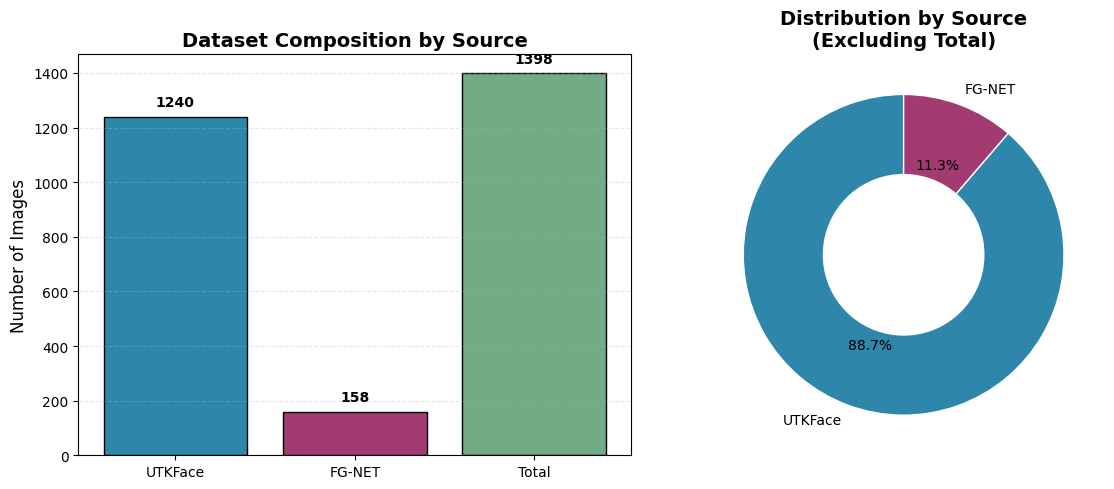

In [4]:
import os

# Path to your final dataset
dataset_path = './Final_Children_Dataset_2_5'

total_count = 0
utk_count = 0
fgnet_count = 0
multimodal_count = 0

print(f"Scanning {dataset_path}...\n")

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        # Check for image extensions
        if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
            total_count += 1

            # Check prefix to see source (based on previous script)
            if file.startswith("UTK_"):
                utk_count += 1
            elif file.startswith("FGNET_"):
                fgnet_count += 1
            else:
                # Assume anything else is from the Multimodal dataset
                multimodal_count += 1

print("--- Dataset Statistics ---")
print(f"UTKFace images (2-5 yrs):   {utk_count}")
print(f"FG-NET images (2-5 yrs):    {fgnet_count}")
print("-" * 30)
print(f"TOTAL DATASET SIZE:         {total_count} images")

#Visualisations - Graphs
import matplotlib.pyplot as plt
import numpy as np

# Data
sources = ['UTKFace', 'FG-NET', 'Total']
counts = [utk_count, fgnet_count, total_count]
colors = ['#2E86AB', '#A23B72','#73AB84']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart
bars = ax1.bar(sources, counts, color=colors, edgecolor='black')
ax1.set_title('Dataset Composition by Source', fontsize=14, fontweight='bold')
ax1.set_ylabel('Number of Images', fontsize=12)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + max(counts)*0.02,
             f'{count}', ha='center', va='bottom', fontweight='bold')

# Donut chart (excluding Total)
ax2.pie(counts[:2], labels=sources[:2], colors=colors[:2], autopct='%1.1f%%',
        startangle=90, wedgeprops=dict(width=0.5, edgecolor='w'))
ax2.set_title('Distribution by Source\n(Excluding Total)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
!pip install pigeon-jupyter

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.4 MB/s eta 0:00:00
  Created wheel for pigeon-jupyter: filename=pigeon_jupyter-0.1.0-py3-none-any.whl size=3865 sha256=2b02b1f7e45227c0679d978f9b70070012e24e6fca8a4fad2c857d41443d9940
  Stored in directory: /root/.cache/pip/wheels/2c/55/ef/43a86d66313cb16ff952e509365baf5ac3e60516ee4c4405b0
Successfully built pigeon-jupyter


In [ ]:
from pigeon import annotate
import os
from IPython.display import display, Image

# 1. Get list of all image paths
dataset_path = './Final_Children_Dataset_2_5'
all_images = []
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.lower().endswith(('.jpg', '.png', '.jpeg')):
            all_images.append(os.path.join(root, file))

# 2. Start Annotating
# Click 'Attentive' or 'Not_Attentive'.
# Results are saved in 'annotations' list as tuples: (filepath, label)
annotations = annotate(
    all_images,
    options=['Attentive', 'Not_Attentive'],
    display_fn=lambda filename: display(Image(filename, width=300))
)

HTML(value='0 examples annotated, 1399 examples left')

Output()

Annotation done.


In [ ]:
import pandas as pd
df = pd.DataFrame(annotations, columns=['file_path', 'label'])
df.to_csv('attentiveness_labels.csv', index=False)
print("Saved annotations to csv!")

Saved annotations to csv!


In [5]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# --- Configuration ---
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42
AUTOTUNE = tf.data.AUTOTUNE

tf.random.set_seed(SEED)
np.random.seed(SEED)

# --- 1. Load and Split Data ---
print("--- Loading Data ---")
df = pd.read_csv('attentiveness_labels.csv')

# Map labels
label_map = {'Attentive': 1, 'Not_Attentive': 0}
df['target'] = df['label'].map(label_map)

# Step A: Split into Train (85%) and Test (15%)
train_val_df, test_df = train_test_split(
    df,
    test_size=0.15,
    stratify=df['target'],
    random_state=SEED
)

# Step B: Split Train_Val (85%) into pure Train (approx 70% total) and Validation (approx 15% total)
# 0.1765 of 85% is roughly 15% of the total
train_df, val_df = train_test_split(
    train_val_df,
    test_size=0.1765,
    stratify=train_val_df['target'],
    random_state=SEED
)

print(f"Total Samples: {len(df)}")
print(f"Training:   {len(train_df)} images")
print(f"Validation: {len(val_df)} images")
print(f"Testing:    {len(test_df)} images")

--- Loading Data ---
Total Samples: 1398
Training:   978 images
Validation: 210 images
Testing:    210 images


In [ ]:
# --- 2. Data Pipeline Functions ---

def process_path(file_path, label):
    """Load, decode, resize, and cast image."""
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, IMG_SIZE)
    return img, label

def augment(image, label):
    """Apply augmentation only to training data."""
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1)
    return image, label

def create_dataset(dataframe, is_training=False, is_testing=False):
    paths = dataframe['file_path'].values
    labels = dataframe['target'].values

    ds = tf.data.Dataset.from_tensor_slices((paths, labels))
    ds = ds.map(process_path, num_parallel_calls=AUTOTUNE)

    if is_training:
        ds = ds.map(augment, num_parallel_calls=AUTOTUNE)
        ds = ds.shuffle(buffer_size=1000)

    # Batch and Prefetch (common for all)
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds

# Create the three datasets
train_ds = create_dataset(train_df, is_training=True)
val_ds   = create_dataset(val_df, is_training=False)
test_ds  = create_dataset(test_df, is_training=False, is_testing=True)

print("Datasets created successfully.")

Datasets created successfully.


In [ ]:
# --- 3. Modular Model Factory ---

def build_model_factory(model_name, input_shape=(224, 224, 3)):
    print(f"Building model using backbone: {model_name}")

    inputs = layers.Input(shape=input_shape)

    # SELECT BACKBONE
    if model_name == 'MobileNetV2':
        # MobileNet expects [-1, 1] scaling
        x = layers.Rescaling(1./127.5, offset=-1)(inputs)
        base_model = keras.applications.MobileNetV2(
            include_top=False, weights='imagenet', input_tensor=x
        )

    elif model_name == 'EfficientNetB0':
        # EfficientNet handles scaling internally (0-255 inputs are fine)
        base_model = keras.applications.EfficientNetB0(
            include_top=False, weights='imagenet', input_tensor=inputs
        )

    elif model_name == 'ResNet50':
        # ResNet expects specific mean subtraction, using generic keras preprocess
        x = keras.applications.resnet50.preprocess_input(inputs)
        base_model = keras.applications.ResNet50(
            include_top=False, weights='imagenet', input_tensor=x
        )
    else:
        raise ValueError(f"Unknown model name: {model_name}")

    # Freeze base model initially
    base_model.trainable = False

    # Custom Head (Classifier)
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)

    model = keras.Model(inputs=base_model.input, outputs=outputs)
    return model



In [ ]:
# ==========================================
# CHANGE THIS STRING TO SWITCH MODELS
# Options: 'MobileNetV2', 'EfficientNetB0', 'ResNet50'
CHOSEN_MODEL = 'MobileNetV2'
# ==========================================

model = build_model_factory(CHOSEN_MODEL)

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', keras.metrics.Precision(name='precision'), keras.metrics.Recall(name='recall')]
)

model.summary()
CHOSEN_MODEL1 = 'EfficientNetB0'
# ==========================================

model1 = build_model_factory(CHOSEN_MODEL1)

model1.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', keras.metrics.Precision(name='precision'), keras.metrics.Recall(name='recall')]
)

model1.summary()

Building model using backbone: MobileNetV2


/tmp/ipython-input-3231662670.py:12: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = keras.applications.MobileNetV2(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ rescaling_1[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis

 Total params: 2,427,201 (9.26 MB)

 Trainable params: 166,657 (651.00 KB)

 Non-trainable params: 2,260,544 (8.62 MB)

Building model using backbone: EfficientNetB0
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_2         │ (None, 224, 224,  │          0 │ input_layer_2[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling_2[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_3         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_3[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,218,788 (16.09 MB)

 Trainable params: 166,657 (651.00 KB)

 Non-trainable params: 4,052,131 (15.46 MB)

In [ ]:
# --- 4. Training Loop ---

checkpoint_path = f"best_model_{CHOSEN_MODEL}.keras"

callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1),
    keras.callbacks.ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1)
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=callbacks
)

Epoch 1/30
25/31 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.6097 - loss: 0.7496 - precision: 0.7154 - recall: 0.7633

KeyboardInterrupt: 

In [ ]:
# --- 5. Final Evaluation on Test Set ---

print("\n--- Evaluating on Test Set ---")
test_loss, test_acc, test_prec, test_rec = model.evaluate(test_ds)

print(f"\nTest Accuracy:  {test_acc:.4f}")
print(f"Test Precision: {test_prec:.4f}")
print(f"Test Recall:    {test_rec:.4f}")

# --- Confusion Matrix & Detailed Report ---
print("\n--- Generating Detailed Report ---")

# Get predictions
y_pred_probs = model.predict(test_ds)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Get true labels (Need to iterate dataset to extract labels in order)
y_true = np.concatenate([y for x, y in test_ds], axis=0)

# 1. Classification Report
print(classification_report(y_true, y_pred, target_names=['Not_Attentive', 'Attentive']))

# 2. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not_Attentive', 'Attentive'],
            yticklabels=['Not_Attentive', 'Attentive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - {CHOSEN_MODEL}')
plt.show()

Training: 1118
Validation: 280


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        81,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,345,153 (8.95 MB)

 Trainable params: 84,609 (330.50 KB)

 Non-trainable params: 2,260,544 (8.62 MB)


Starting Training (MobileNetV2)...
Epoch 1/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.5292 - loss: 0.9479 - precision: 0.7451 - recall: 0.5178 - val_accuracy: 0.6679 - val_loss: 0.6461 - val_precision: 0.7131 - val_recall: 0.8832 - learning_rate: 0.0010
Epoch 2/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.7044 - loss: 0.6544 - precision: 0.7611 - recall: 0.8389 - val_accuracy: 0.7071 - val_loss: 0.6355 - val_precision: 0.7186 - val_recall: 0.9594 - learning_rate: 0.0010
Epoch 3/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.7715 - loss: 0.4785 - precision: 0.8094 - recall: 0.8927 - val_accuracy: 0.7107 - val_loss: 0.6060 - val_precision: 0.7231 - val_recall: 0.9543 - learning_rate: 0.0010
Epoch 4/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.7805 - loss: 0.4626 - precision: 0.8159 - recall: 0.8889 - val_accuracy: 0.6964 - val_loss: 0.6233 - val_precision: 0.7276 - val_recall: 0.9086 - learning_rate: 0.0010
Epoch 5/30
35/35 ━━━━━━━━━━━━━━━━━━━

KeyboardInterrupt: 

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# --- CONFIGURATION ---
N_SPLITS = 5  # Standard for robust CV
EPOCHS = 25   # Slightly lower epochs per fold since we have 5 folds
BATCH_SIZE = 32
CHOSEN_MODEL = 'MobileNetV2' # Or 'EfficientNetB0'

# Lists to store metrics per fold
acc_per_fold = []
loss_per_fold = []
histories = []

# Initialize Cross-Validation
# We use train_val_df (85% of data). We KEEP test_df HIDDEN until the very end.
skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=42)

# Extract X (paths) and y (targets) for splitting
X_cv = train_val_df['file_path'].values
y_cv = train_val_df['target'].values

fold_no = 1

print(f"Starting {N_SPLITS}-Fold Stratified Cross-Validation on {len(X_cv)} samples...\n")

for train_index, val_index in skf.split(X_cv, y_cv):
    print(f"------------------------------------------------------------------------")
    print(f"Training for Fold {fold_no} ...")

    # 1. Split Data for this specific fold
    # Using iloc to select by index from the dataframe
    X_train_fold, X_val_fold = X_cv[train_index], X_cv[val_index]
    y_train_fold, y_val_fold = y_cv[train_index], y_cv[val_index]

    # Create temporary DataFrames for the pipeline functions
    train_fold_df = pd.DataFrame({'file_path': X_train_fold, 'target': y_train_fold})
    val_fold_df = pd.DataFrame({'file_path': X_val_fold, 'target': y_val_fold})

    # 2. Create tf.data.Datasets
    train_ds_fold = create_dataset(train_fold_df, is_training=True)
    val_ds_fold = create_dataset(val_fold_df, is_training=False)

    # 3. Build a FRESH Model (Crucial: Reset weights every fold)
    tf.keras.backend.clear_session() # Clear RAM
    model = build_model_factory(CHOSEN_MODEL)

    # 4. Compile
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    # 5. Define Callbacks for this fold

    # A. Dynamic Learning Rate (Reactive)
    lr_reduce = keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=3,
        min_lr=1e-6,
        verbose=1
    )

    # B. Early Stopping
    early_stop = keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=6,
        restore_best_weights=True,
        verbose=1
    )

    # 6. Train
    history = model.fit(
        train_ds_fold,
        validation_data=val_ds_fold,
        epochs=EPOCHS,
        callbacks=[lr_reduce, early_stop],
        verbose=1
    )

    # 7. Evaluate this fold
    scores = model.evaluate(val_ds_fold, verbose=0)
    print(f"Score for fold {fold_no}: Loss of {scores[0]:.4f}; Accuracy of {scores[1]*100:.2f}%")

    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    histories.append(history)

    fold_no += 1

# --- RESULTS ANALYSIS ---
print("\n------------------------------------------------------------------------")
print("Average Scores for all folds:")
print(f"> Accuracy: {np.mean(acc_per_fold):.2f}% (+- {np.std(acc_per_fold):.2f}%)")
print(f"> Loss: {np.mean(loss_per_fold):.4f}")
print("------------------------------------------------------------------------")

Starting 5-Fold Stratified Cross-Validation on 1188 samples...

------------------------------------------------------------------------
Training for Fold 1 ...
Building model using backbone: MobileNetV2
Epoch 1/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.5024 - loss: 1.1875 - val_accuracy: 0.6975 - val_loss: 0.6234 - learning_rate: 0.0010
Epoch 2/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.7379 - loss: 0.5841 - val_accuracy: 0.7101 - val_loss: 0.6141 - learning_rate: 0.0010
Epoch 3/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.7620 - loss: 0.5074 - val_accuracy: 0.6933 - val_loss: 0.6319 - learning_rate: 0.0010
Epoch 4/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.8468 - loss: 0.3396 - val_accuracy: 0.6933 - val_loss: 0.6468 - learning_rate: 0.0010
Epoch 5/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8254 - loss: 0.3757
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
30/30 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/st

In [ ]:
print("\n--- Training Final Model on Full Training Set ---")

# 1. Full Train/Val Dataset
final_train_ds = create_dataset(train_val_df, is_training=True)
final_test_ds = create_dataset(test_df, is_training=False) # The hold-out set

# 2. Build & Compile
tf.keras.backend.clear_session()
final_model = build_model_factory(CHOSEN_MODEL)
final_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', keras.metrics.Precision(name='precision'), keras.metrics.Recall(name='recall')]
)

# 3. Train
final_history = final_model.fit(
    final_train_ds,
    epochs=30, # Can go slightly higher for final model
    callbacks=[
        keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=3),
        keras.callbacks.EarlyStopping(patience=8, restore_best_weights=True)
    ]
)

# 4. Final Evaluation
print("\n--- FINAL HOLDOUT TEST RESULTS ---")
results = final_model.evaluate(final_test_ds)
print(f"Test Accuracy: {results[1]*100:.2f}%")

# Save the final model
final_model.save(f'Child_Attentive_Model_{CHOSEN_MODEL}_Final.keras')


--- Training Final Model on Full Training Set ---
Building model using backbone: MobileNetV2
Epoch 1/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.5351 - loss: 0.9706 - precision: 0.7358 - recall: 0.5278 - learning_rate: 0.0010
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.7546 - loss: 0.5354 - precision: 0.8191 - recall: 0.8503 - learning_rate: 0.0010
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.7706 - loss: 0.4917 - precision: 0.8186 - recall: 0.8608 - learning_rate: 0.0010
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.8253 - loss: 0.3781 - precision: 0.8510 - recall: 0.9121 - learning_rate: 0.0010
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.8365 - loss: 0.3912 - precision: 0.8516 - recall: 0.9275 - learning_rate: 0.0010
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.8556 - loss: 0.3189 - precision: 0.8791 - recall: 0.9240 - learning_rate: 0.0010
Epoch 7/30
38/38 ━━━━━━━━━━━━━━━━━━━

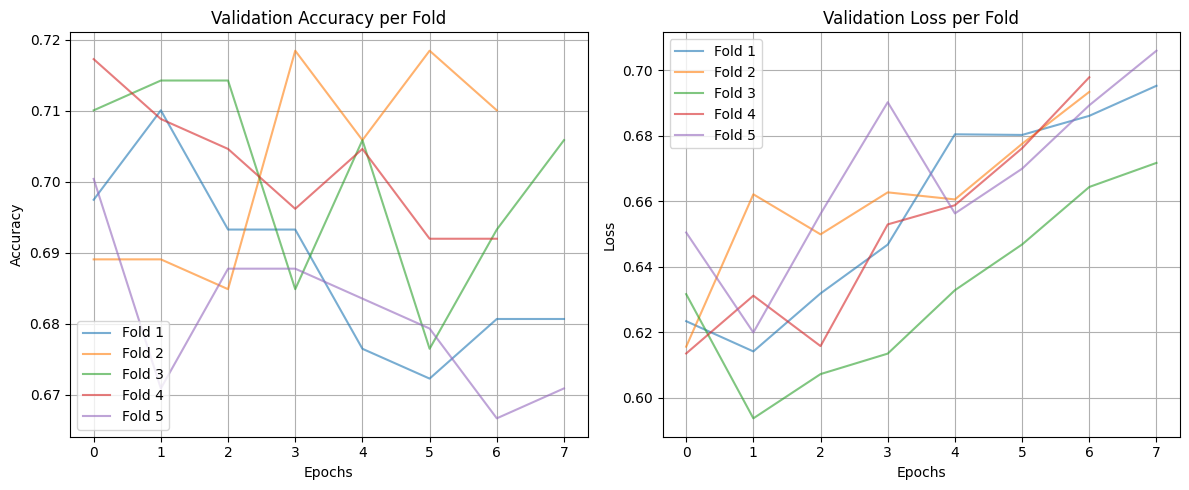

In [ ]:
def plot_cv_history(histories):
    plt.figure(figsize=(12, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    for i, h in enumerate(histories):
        plt.plot(h.history['val_accuracy'], label=f'Fold {i+1}', alpha=0.6)
    plt.title('Validation Accuracy per Fold')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot Loss
    plt.subplot(1, 2, 2)
    for i, h in enumerate(histories):
        plt.plot(h.history['val_loss'], label=f'Fold {i+1}', alpha=0.6)
    plt.title('Validation Loss per Fold')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_cv_history(histories)

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight  # <--- Added for Class Weights

# --- 1. Config ---
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 20  # Increased to 20 to let EarlyStopping/Dynamic LR do their work
SEED = 42
CHOSEN_MODEL = 'MobileNetV2'

tf.random.set_seed(SEED)
np.random.seed(SEED)

# --- 2. Augmentation & Processing ---
def augment(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
    image = tf.image.random_saturation(image, lower=0.8, upper=1.2)
    return image, label

def process_path(file_path, label):
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, IMG_SIZE)
    return img, label

# --- 3. Model Factory ---
def build_regularized_model(model_name, input_shape=(224, 224, 3)):
    print(f"Building REGULARIZED model using: {model_name}")
    inputs = layers.Input(shape=input_shape)

    if model_name == 'MobileNetV2':
        x = layers.Rescaling(1./127.5, offset=-1)(inputs)
        base_model = keras.applications.MobileNetV2(include_top=False, weights='imagenet', input_tensor=x)
    elif model_name == 'EfficientNetB0':
        base_model = keras.applications.EfficientNetB0(include_top=False, weights='imagenet', input_tensor=inputs)

    base_model.trainable = False

    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)

    model = keras.Model(inputs=base_model.input, outputs=outputs)
    return model

# --- 4. Setup Data ---
# Ensure df is loaded (uncomment if starting fresh)
# df = pd.read_csv('attentiveness_labels.csv')
# df['target'] = df['label'].map({'Attentive': 1, 'Not_Attentive': 0})

train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['target'], random_state=SEED)

train_ds = create_ds(train_df, is_train=True)
val_ds = create_ds(val_df, is_train=False)

# --- NEW: Calculate Class Weights ---
# This ensures the model pays equal attention to both classes even if data is imbalanced
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_df['target']),
    y=train_df['target']
)
class_weight_dict = dict(enumerate(class_weights))
print(f"Computed Class Weights: {class_weight_dict}")

# --- 5. Callbacks ---
callbacks = [
    # Stop training if val_loss doesn't improve for 5 epochs
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),
    # Lower Learning Rate if val_loss gets stuck for 2 epochs
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=2,
        min_lr=1e-6,
        verbose=1
    )
]

# --- 6. Train ---
keras.backend.clear_session()
model = build_regularized_model(CHOSEN_MODEL)

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("\n--- Starting Training with Callbacks & Weights ---")
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=callbacks,          # <--- Added Callbacks
    class_weight=class_weight_dict # <--- Added Class Weights
)

print("\n--- Final Validation Performance ---")
val_loss, val_acc = model.evaluate(val_ds)
print(f"Validation Accuracy: {val_acc*100:.2f}%")

Computed Class Weights: {0: np.float64(1.6990881458966565), 1: np.float64(0.7084917617237009)}
Building REGULARIZED model using: MobileNetV2

--- Starting Training with Callbacks & Weights ---
Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.5606 - loss: 2.4102 - val_accuracy: 0.5893 - val_loss: 1.7427 - learning_rate: 0.0010
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.5719 - loss: 1.9654 - val_accuracy: 0.6321 - val_loss: 1.6371 - learning_rate: 0.0010
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.5638 - loss: 1.8839 - val_accuracy: 0.6464 - val_loss: 1.5377 - learning_rate: 0.0010
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.6006 - loss: 1.6471 - val_accuracy: 0.6500 - val_loss: 1.4682 - learning_rate: 0.0010
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.6617 - loss: 1.4898 - val_accuracy: 0.6500 - val_loss: 1.4166 - learning_rate: 0.0010
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accur

In [ ]:
# Add this to understand your data distribution
print("\n=== CLASS DISTRIBUTION ===")
print(f"Total samples: {len(df)}")
print(df['label'].value_counts())
print(f"Ratio Attentive:Not_Attentive = {df['target'].mean():.2%}:{1-df['target'].mean():.2%}")

# If imbalanced (e.g., 90%:10%), that's likely the issue
if abs(df['target'].mean() - 0.5) > 0.3:
    print("⚠️ WARNING: Severe class imbalance detected!")


=== CLASS DISTRIBUTION ===
Total samples: 1398
label
Attentive        986
Not_Attentive    412
Name: count, dtype: int64
Ratio Attentive:Not_Attentive = 70.53%:29.47%


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# --- CONFIG ---
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
# MobileNetV3 expects 0-255 inputs (preprocess_input handles the rest internally)
preprocess_input = tf.keras.applications.mobilenet_v3.preprocess_input

# --- 1. FIXED IMAGE PROCESSING (With Padding) ---
def process_path(file_path, label):
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)

    # CRITICAL FIX: Use resize_with_pad
    # This keeps the face shape natural (no squashing)
    img = tf.image.resize_with_pad(img, IMG_SIZE[0], IMG_SIZE[1])

    return img, label

# --- 2. SAFE AUGMENTATION (No Rotation) ---
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    # REMOVED RandomRotation entirely
    layers.RandomContrast(0.15),
    layers.RandomBrightness(0.15),
])

def prepare_dataset(dataframe, is_training=False):
    paths = dataframe['file_path'].values
    labels = dataframe['target'].values

    ds = tf.data.Dataset.from_tensor_slices((paths, labels))
    ds = ds.map(process_path, num_parallel_calls=tf.data.AUTOTUNE)

    if is_training:
        ds = ds.shuffle(1000)
        ds = ds.batch(BATCH_SIZE)
        ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y),
                   num_parallel_calls=tf.data.AUTOTUNE)
    else:
        ds = ds.batch(BATCH_SIZE)

    ds = ds.prefetch(buffer_size=tf.data.AUTOTUNE)
    return ds

# Re-create your datasets with the new processing
train_ds = prepare_dataset(train_df, is_training=True)
val_ds = prepare_dataset(val_df, is_training=False)

# --- 3. BUILD MODEL (MobileNetV3Small) ---
def build_edge_model():
    print("Building MobileNetV3Small (Edge Optimized)...")
    inputs = layers.Input(shape=(224, 224, 3))

    # Apply specific MobileNetV3 preprocessing
    x = layers.Lambda(preprocess_input)(inputs)

    base_model = keras.applications.MobileNetV3Small(
        include_top=False,
        weights="imagenet",
        input_tensor=x
    )

    base_model.trainable = False

    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)

    # Simpler head with lower dropout
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)  # Reduced from 0.4 to 0.2 to fix underfitting

    x = layers.Dense(64, activation="relu")(x)

    outputs = layers.Dense(1, activation="sigmoid")(x)

    model = keras.Model(inputs, outputs)
    return model, base_model

model, base_model = build_edge_model()

# --- 4. PHASE 1: TRAIN HEAD ---
print("\n--- PHASE 1: Training Head ---")
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train longer (20 epochs) to force the head to learn before unfreezing
history1 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    class_weight=class_weights,
    callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]
)

# --- 5. PHASE 2: FINE TUNING ---
print("\n--- PHASE 2: Fine Tuning ---")
base_model.trainable = True

# Unfreeze only the last 40 layers (Top blocks)
for layer in base_model.layers[:-40]:
    layer.trainable = False

# Use a safe, low learning rate
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history2 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    initial_epoch=len(history1.epoch),
    class_weight=class_weights,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3)
    ]
)

print(f"\nFinal Accuracy: {model.evaluate(val_ds)[1]*100:.2f}%")

Building MobileNetV3Small (Edge Optimized)...
4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

--- PHASE 1: Training Head ---
Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 35s 564ms/step - accuracy: 0.4992 - loss: 0.7668 - val_accuracy: 0.6714 - val_loss: 0.6338
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 40s 546ms/step - accuracy: 0.6475 - loss: 0.6109 - val_accuracy: 0.6929 - val_loss: 0.6185
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 18s 489ms/step - accuracy: 0.6970 - loss: 0.5780 - val_accuracy: 0.7179 - val_loss: 0.6177
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 523ms/step - accuracy: 0.7623 - loss: 0.4837 - val_accuracy: 0.7250 - val_loss: 0.5931
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 18s 482ms/step - accuracy: 0.8154 - loss: 0.4406 - val_accuracy: 0.7214 - val_loss: 0.5931
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 21s 564ms/step - accuracy: 0.8076 - loss: 0.4317 - val_accuracy: 0.7107 - val_loss: 0.5817
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 21s 555ms/step - accuracy: 0.7996 - loss: 0.4128 - val_accura

/tmp/ipython-input-3288214872.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='viridis')


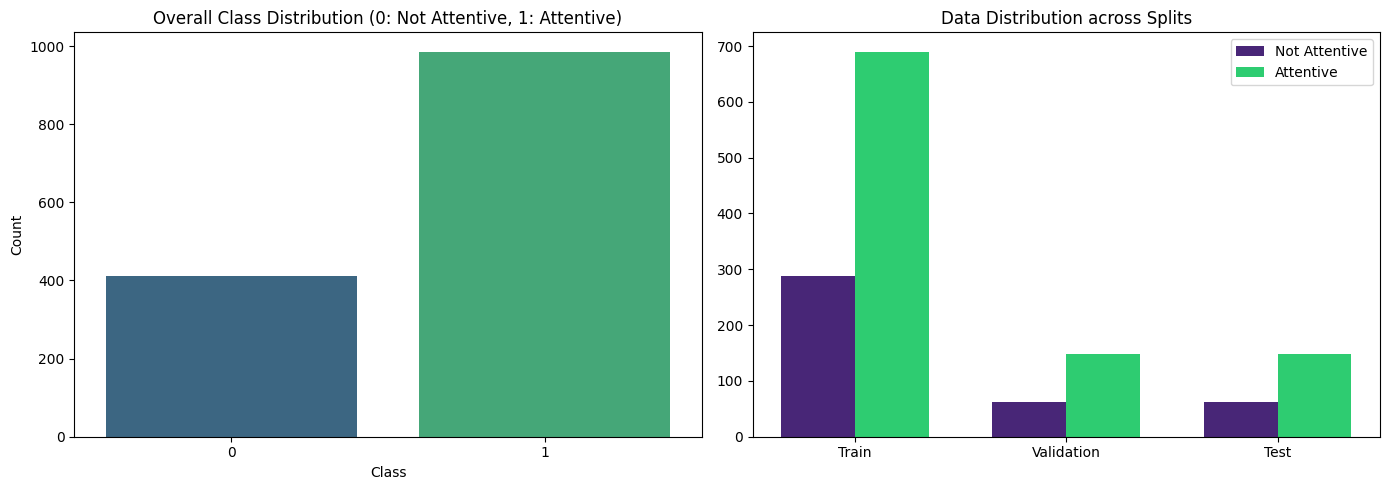

History object not found (run training first).


NameError: name 'model' is not defined

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

# --- 1. Data Distribution & Split Visualization ---
def plot_data_health(df, train_df, val_df, test_df):
    plt.figure(figsize=(14, 5))

    # Plot 1: Overall Class Imbalance
    plt.subplot(1, 2, 1)
    sns.countplot(x='target', data=df, palette='viridis')
    plt.title('Overall Class Distribution (0: Not Attentive, 1: Attentive)')
    plt.xlabel('Class')
    plt.ylabel('Count')

    # Plot 2: Split Distribution
    plt.subplot(1, 2, 2)
    sets = ['Train', 'Validation', 'Test']
    attentive = [train_df['target'].sum(), val_df['target'].sum(), test_df['target'].sum()]
    not_attentive = [len(train_df)-attentive[0], len(val_df)-attentive[1], len(test_df)-attentive[2]]

    x = np.arange(len(sets))
    width = 0.35

    plt.bar(x - width/2, not_attentive, width, label='Not Attentive', color='#482677')
    plt.bar(x + width/2, attentive, width, label='Attentive', color='#2ecc71')
    plt.xticks(x, sets)
    plt.title('Data Distribution across Splits')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_data_health(df, train_df, val_df, test_df)

# --- 2. Training History (Loss & Accuracy) ---
def plot_training_history(history):
    # Handle case where history might be a list (from CV) or single object
    # Assuming 'history' is the final fit object here
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(14, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy', linestyle='--')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.grid(True, alpha=0.3)

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss', linestyle='--')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.grid(True, alpha=0.3)

    plt.show()

# Pass the 'history' object from your last training run (e.g., history2 or final_history)
try:
    plot_training_history(history2) # Or 'history' depending on your variable name
except:
    print("History object not found (run training first).")

# --- 3. Confusion Matrix & ROC Curve ---
def evaluate_performance(model, test_ds):
    # Get predictions
    y_pred_probs = model.predict(test_ds)
    y_pred = (y_pred_probs > 0.5).astype(int).flatten()

    # Extract true labels from dataset
    y_true = np.concatenate([y for x, y in test_ds], axis=0)

    plt.figure(figsize=(14, 6))

    # Confusion Matrix
    plt.subplot(1, 2, 1)
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Attentive', 'Attentive'],
                yticklabels=['Not Attentive', 'Attentive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # ROC Curve
    plt.subplot(1, 2, 2)
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")

    plt.tight_layout()
    plt.show()

    # Prediction Histogram (Validation vs Prediction confidence)
    plt.figure(figsize=(8, 4))
    plt.hist(y_pred_probs[y_true==1], bins=20, alpha=0.5, label='Actual Attentive', color='green')
    plt.hist(y_pred_probs[y_true==0], bins=20, alpha=0.5, label='Actual Not Attentive', color='red')
    plt.xlabel('Predicted Probability (Confidence)')
    plt.ylabel('Count')
    plt.title('Prediction Confidence Histogram')
    plt.legend()
    plt.show()

# Run evaluation on your current 'model'
evaluate_performance(model, val_ds)

In [ ]:
import cv2

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # 1. Create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions

    # Note: Because we wrapped MobileNetV2 in a Functional model,
    # we need to find the inner base_model (MobileNetV2) and the classifier part separately

    # Access the base model (assuming it's the first or second layer in your sequential-like model)
    # If using the 'build_edge_model' from previous code, 'base_model' variable is available globally.
    # If not, we extract it:
    inner_model = model.layers[1] if isinstance(model.layers[1], keras.Model) else model.layers[0]

    # Create a sub-model that outputs the last conv layer
    grad_model = tf.keras.models.Model(
        [inner_model.inputs],
        [inner_model.get_layer(last_conv_layer_name).output, inner_model.output]
    )

    # 2. Compute Gradients
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)

    # 3. Pool Gradients
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # 4. Weight the channels
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # 5. Normalize
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def display_gradcam(img_path, heatmap, alpha=0.4):
    # Load original image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize heatmap to match image
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

    # Convert heatmap to RGB
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    # Superimpose
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype('uint8')

    # Display
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(img)
    ax[0].set_title("Original")
    ax[0].axis('off')

    ax[1].imshow(superimposed_img)
    ax[1].set_title("Grad-CAM (Attention Map)")
    ax[1].axis('off')
    plt.show()

# --- Run XAI ---
# MobileNetV2 last conv layer is usually 'out_relu'
# MobileNetV3Small last conv layer is usually 'Conv_1'
# Adjust 'layer_name' based on the model you actually trained in the previous step
TARGET_LAYER = 'out_relu' if 'MobileNetV2' in CHOSEN_MODEL else 'Conv_1'

# Pick a random image from validation set
sample_path = val_df.sample(1).iloc[0]['file_path']

# Prepare image
img = tf.io.read_file(sample_path)
img = tf.image.decode_jpeg(img, channels=3)
img = tf.image.resize_with_pad(img, 224, 224) # Match your training preprocessing
img_array = tf.expand_dims(img, axis=0)

# Generate Heatmap (Pass the 'base_model' variable from your training code if possible, or extract it)
try:
    # We use 'base_model' from the previous code block where you defined build_edge_model
    heatmap = make_gradcam_heatmap(img_array, model, TARGET_LAYER)
    print(f"Explaining Image: {sample_path}")
    display_gradcam(sample_path, heatmap)
except Exception as e:
    print(f"Could not generate Grad-CAM: {e}")
    print("Tip: Ensure 'base_model' is accessible and 'TARGET_LAYER' exists in model.summary()")

In [ ]:
# --- Configuration ---
EDGE_EPOCHS = 5 # Quick comparison
input_shape = (224, 224, 3)

# 1. Define the contenders
def get_edge_models():
    models = {}

    # Model 1: NASNetMobile (Very small, optimized via architecture search)
    base_1 = keras.applications.NASNetMobile(include_top=False, weights='imagenet', input_shape=input_shape)
    models['NASNetMobile'] = base_1

    # Model 2: DenseNet121 (Efficient feature reuse)
    base_2 = keras.applications.DenseNet121(include_top=False, weights='imagenet', input_shape=input_shape)
    models['DenseNet121'] = base_2

    # Model 3: MobileNetV3Large (The bigger brother of what we used earlier)
    base_3 = keras.applications.MobileNetV3Large(include_top=False, weights='imagenet', input_shape=input_shape)
    models['MobileNetV3Large'] = base_3

    # Model 4: EfficientNetV2B0 (Faster and lighter than standard EfficientNet)
    base_4 = keras.applications.EfficientNetV2B0(include_top=False, weights='imagenet', input_shape=input_shape)
    models['EfficientNetV2B0'] = base_4

    return models

# 2. The Arena Loop
results = {'Model': [], 'Val Accuracy': [], 'Params': []}

print(f"\n--- Starting Edge Model Comparison ({EDGE_EPOCHS} epochs each) ---")

edge_models = get_edge_models()

for name, base_model in edge_models.items():
    print(f"\nTraining {name}...")

    # Freeze base
    base_model.trainable = False

    # Attach Head
    inputs = keras.Input(shape=input_shape)
    # Note: Some models expect specific preprocessing, but for comparison we use standard scaling
    if name == 'DenseNet121':
        x = keras.applications.densenet.preprocess_input(inputs)
    elif name == 'NASNetMobile':
        x = keras.applications.nasnet.preprocess_input(inputs)
    else:
        # MobileNetV3 and EffNetV2 handle internal preprocessing mostly
        x = inputs

    x = base_model(x, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)

    comp_model = keras.Model(inputs, outputs)

    comp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train
    h = comp_model.fit(train_ds, validation_data=val_ds, epochs=EDGE_EPOCHS, verbose=0)

    # Evaluate
    val_acc = h.history['val_accuracy'][-1]
    params = comp_model.count_params()

    print(f"--> {name} finished. Val Acc: {val_acc:.4f}")

    results['Model'].append(name)
    results['Val Accuracy'].append(val_acc)
    results['Params'].append(params)

    # Clear memory
    tf.keras.backend.clear_session()

# --- 3. Visualize Comparison ---
res_df = pd.DataFrame(results)
res_df = res_df.sort_values(by='Val Accuracy', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Val Accuracy', y='Model', data=res_df, palette='magma')
plt.title(f'Edge Model Comparison (Fixed Head, {EDGE_EPOCHS} Epochs)')
plt.xlim(0, 1.0)
for index, value in enumerate(res_df['Val Accuracy']):
    plt.text(value, index, f'{value:.2%}', va='center')
plt.show()

print(res_df)